<a href="https://colab.research.google.com/github/luquelab/lab-data-science/blob/data-distribution/notebooks/generate_multimodal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating a multimodal data sample

## Description

This notebook generates a multimodal data sample. The user can define the properties of the multimodal distribution and the number of data points generated. This data is useful for validation of pipelines inferring the distribution of a data sample. The code outputs the data file and several figures.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Input parameters
The user can define the characteristics of the multimodal data sample in the code cell below. The parameters include:
+ `x_range`: Tuple indicating the range of values for the data sample. Example: `x_range =  (12,53)`.
+ `n_modes`: Integer defining the number of modes in the distribution. Example: `n_modes = 3`.
+ `mode_locations`: List providing the locations of each mode. Example: `mode_locations = [17,25,45]`.
+ `mode_std`: List providing the standard deviations for each mode. Example: `mode_std = [3,5,7]`.
+ `mode_intensities`: List providing the relative intensities of each mode. Example `mode_intensities = [5,20,1]`.
+ `n_data`: Integer defining the amount of points to generate following the distribution. Example `n_data = 1000`.


In [21]:
# Set parameters
x_range = (12,53)
n_modes = 3
mode_locations = [17,25,45]
mode_std = [3,5,7]
mode_intensities = [5,20,1]
n_data = 1000

# Code
Section containing the main body of the code.

## Definitions

In [16]:
# Class Modes
### This class defines an object that contains the main parameters defining a multimodal distribution
class Modes:
    def __init__(self, n_modes, mode_locations, mode_std, mode_intensities):
        self.n_modes = n_modes
        self.mode_locations = mode_locations
        self.mode_std = mode_std
        self.mode_intensities = mode_intensities


In [27]:
# Function
## This function generates the multimodal distribution.
def multimodal_distribution(x_range, modes,n_data):
    """
    Generates a multimodal distribution by combining normal distributions.

    Args:
        x_range (tuple): Range of x-values for the distribution (min, max).
        modes (Modes): Object containing mode information.
        n_data (int): Number of data points to generate.

    Returns:
        numpy.ndarray: The generated distribution.
    """

    # Set range and data points stochastically.
    x = np.linspace(x_range[0], x_range[1], n_data)
    distribution = np.zeros_like(x, dtype=float)

    # Generate normal distributions for each mode
    for i in range(modes.n_modes):

        mode_location = modes.mode_locations[i]
        mode_distribution = modes.mode_intensities[i] * np.exp(-0.5 * ((x - mode_location) / modes.mode_std[i])**2)

        # Add to the overall distribution
        distribution += mode_distribution

    return distribution

## Example
# modes = Modes(n_modes=3, mode_locations=[17, 25, 45], mode_std=[3, 5, 7], mode_intensities=[5, 20, 1])

In [28]:
# Function
## This function prints the attributes of an object without knowing the name
## of the attributes in advance.
def print_attributes(obj):
  """Prints all attributes of an object.

  Args:
    obj: The object whose attributes you want to print.
  """
  for attr in dir(obj):
    if not attr.startswith("__"):  # Exclude special attributes
      value = getattr(obj, attr)
      print(f"{attr}: {value}")

## Example
# my_object = Modes(n_modes=3, mode_locations=[17, 25, 45], mode_std=[3, 5, 7], mode_intensities=[5, 20, 1])
# print_attributes(my_object)

In [29]:
print_attributes(modes)

mode_intensities: [5, 20, 1]
mode_locations: [17, 25, 45]
mode_std: [3, 5, 7]
n_modes: 3


In [ ]:
# prompt: Extract all the attributes from the object modes

# Assuming you have an instance of the Modes class named 'modes_instance'
# Example:
modes_instance = Modes(n_modes=3, mode_locations=[17, 25, 45], mode_std=[3, 5, 7], mode_intensities=[5, 20, 1])

# Accessing attributes:
print("Number of modes:", modes_instance.n_modes)
print("Mode locations:", modes_instance.mode_locations)
print("Mode standard deviations:", modes_instance.mode_std)
print("Mode intensities:", modes_instance.mode_intensities)


In [22]:
print(modes.n_modes)
modes.mode_intensities
modes.mode_locations
modes.mode_std

[3, 5, 7]

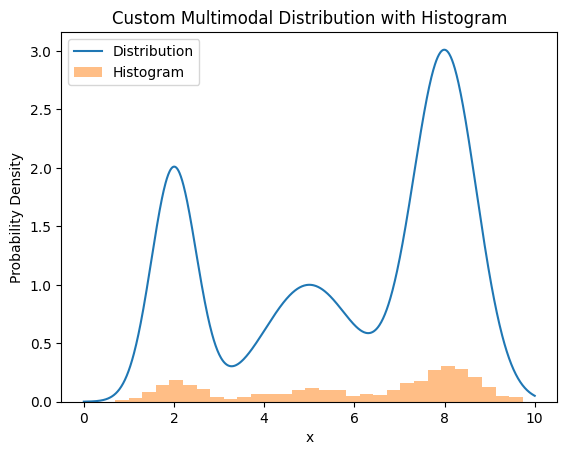

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def multimodal_distribution(x_range, mode_locations, intensities, std_devs=[1, 1]):
    """
    Generates a multimodal distribution by combining normal distributions.

    Args:
        x_range (tuple): Range of x-values for the distribution (min, max).
        mode_locations (list): Locations of each mode.
        intensities (list): Intensities of each mode.
        std_devs (list, optional): Standard deviations of each mode. Defaults to [1, 1].

    Returns:
        numpy.ndarray: The generated distribution.
    """

    x = np.linspace(x_range[0], x_range[1], 1000)
    distribution = np.zeros_like(x, dtype=float)

    for i in range(len(mode_locations)):
        # Generate normal distribution for the current mode
        mode_location = mode_locations[i]
        mode_distribution = intensities[i] * np.exp(-0.5 * ((x - mode_location) / std_devs[i])**2)

        # Add to the overall distribution
        distribution += mode_distribution

    return distribution

def generate_data_points(distribution, x_range, num_points):
    """
    Generates data points based on the given distribution.

    Args:
        distribution (numpy.ndarray): The probability distribution.
        x_range (tuple): Range of x-values for the distribution (min, max).
        num_points (int): Number of data points to generate.

    Returns:
        numpy.ndarray: The generated data points.
    """

    x = np.linspace(x_range[0], x_range[1], 1000)
    cdf = np.cumsum(distribution)  # Calculate cumulative distribution function
    cdf /= cdf[-1]  # Normalize CDF to range [0, 1]

    random_numbers = np.random.rand(num_points)
    data_points = np.interp(random_numbers, cdf, x)  # Inverse transform sampling

    return data_points

# Example usage with custom values:
x_range = (0, 10)
mode_locations = [2, 5, 8]  # User-defined mode locations
intensities = [2, 1, 3]
std_devs = [0.5, 1, 0.7]
custom_distribution = multimodal_distribution(x_range, mode_locations, intensities, std_devs)

# Generate data points
num_points = 1000
data_points = generate_data_points(custom_distribution, x_range, num_points)

# Plotting the distribution and histogram
plt.plot(np.linspace(x_range[0], x_range[1], 1000), custom_distribution, label='Distribution')
plt.hist(data_points, bins=30, density=True, alpha=0.5, label='Histogram')
plt.title('Custom Multimodal Distribution with Histogram')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Saving the data points
np.savetxt('data_points.txt', data_points)